# TP3: Machine Learning

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle
import pandas as pd
from sklearn import metrics

## Análisis Univariado

In [99]:
def roc_univariado(valores, etiquetas, etiqueta_true):
    """
    Args:
        valores valores del feature de interes
        etiquetas etiquetas para cada valor
        etiqueta_true etiqueta a la que corresponde cuando el valore es mayor al umbral
        
    Returns:
        umbrales
        tprs
        fprs
        area bajo la curva roc
        tnrs
    """
    m = min(valores)
    M = max(valores) 
    n = 100
    xs = np.linspace(m, M * 1.01, n)
    tprs = []
    fprs = []
    tnrs = []
    for idx in range(n):
        ts = np.array((valores >= xs[idx]).values)
        
        tp = np.sum(etiquetas[ts] == etiqueta_true)
        fp = np.sum(etiquetas[ts] != etiqueta_true)
        tn = np.sum(etiquetas[np.invert(ts)] != etiqueta_true)
        fn = np.sum(etiquetas[np.invert(ts)] == etiqueta_true)
        
        tpr = tp / (tp + fn) #sensitivity
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp) #specificity
        
        tprs.append(tpr)
        fprs.append(fpr)
        tnrs.append(tnr)
        
    tprs = np.array(tprs)
    fprs = np.array(fprs)
    tnrs = np.array(tnrs)

    aroc = metrics.roc_auc_score([c == etiqueta_true for c in etiquetas], valores)
        
    return (xs, tprs, fprs, aroc, tnrs)

In [51]:
etiquetas = np.array(['P'] * 10 + ['S'] * 10)

### Atributo: Potencia de bandas espectrales (promedio entre trials)

In [52]:
band_means = pd.read_pickle('pickles/band_power_mean.pkl')

Se aplica la función _roc_ _univariado_ para todas las bandas espectrales:

In [100]:
xs_a, tprs_a, fprs_a, aroc_a, tnrs_a = roc_univariado(band_means['alpha'], etiquetas, 'S')
xs_b, tprs_b, fprs_b, aroc_b, tnrs_b = roc_univariado(band_means['beta'], etiquetas, 'S')
xs_d, tprs_d, fprs_d, aroc_d, tnrs_d = roc_univariado(band_means['delta'], etiquetas, 'P')
xs_t, tprs_t, fprs_t, aroc_t, tnrs_t = roc_univariado(band_means['theta'], etiquetas, 'S')
xs_g, tprs_g, fprs_g, aroc_g, tnrs_g = roc_univariado(band_means['gamma'], etiquetas, 'S')

#### Curva ROC - Atributo: potencia de banda espectral (promedio entre trials)

A continuación se grafican todas las curvas ROC según la clasificación anterior. Además se reporta el área bajo la curva para cada caso.

/home/march/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


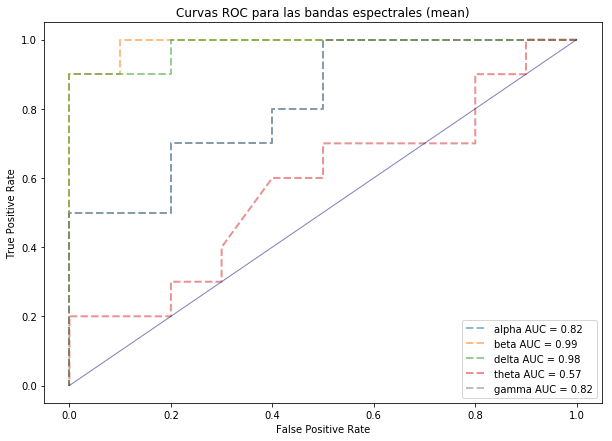

In [101]:
plt.figure(figsize=(10, 7))
plot(fprs_a, tprs_a, lw=2, ls='--', alpha=0.5, label='alpha AUC = {:.2f}'.format(aroc_a))
plot(fprs_b, tprs_b, lw=2, ls='--', alpha=0.5, label='beta AUC = {:.2f}'.format(aroc_b))
plot(fprs_d, tprs_d, lw=2, ls='--', alpha=0.5, label='delta AUC = {:.2f}'.format(aroc_d))
plot(fprs_t, tprs_t, lw=2, ls='--', alpha=0.5, label='theta AUC = {:.2f}'.format(aroc_t))
plot(fprs_g, tprs_g, lw=2, ls='--', alpha=0.5, color='gray', linestyle='--', label='gamma AUC = {:.2f}'.format(aroc_g))
plot([0, 1], [0, 1], color='navy', lw=1, linestyle='-', alpha=0.5)
xlabel('False Positive Rate')
ylabel('True Positive Rate')
legend(loc='lower right')
title('Curvas ROC para las bandas espectrales (mean)')

En una primera inspección del gráfico se observa cómo las bandas espectrales beta y delta son los mejores atributos (AUC beta = 0.99 y AUC delta = 0.98) para identificar sujetos de los grupos S y P respectivamente. Por su parte el atributo theta no resulta conveniente para la clasificación de los sujetos ya que tiene un desempeño similar al azar. Por último, tanto la banda alpha como gamma logran un desempeño similar. A continuación se presentan magnitudes que permitirán una valoración más acabada de los atributos en cuestión. 

#### Sensibilidad y especificidad para cada banda espectral (mean)

A modo de ejemplo en la siguiente tabla se ha seleccionado un umbral para cada atributo y se reporta la Especificidad (TNR) y la Sensibilidad (TPR)

In [102]:
i = 7
pd.DataFrame({
    'Sensibilidad':{
        'alpha': tprs_a[i], 
        'beta': tprs_b[i], 
        'delta': tprs_d[i], 
        'theta': tprs_t[i], 
        'gamma': tprs_g[i]
    }, 
    'Especificidad': {
        'alpha': tnrs_a[i], 
        'beta': tnrs_b[i], 
        'delta': tnrs_d[i], 
        'theta': tnrs_t[i], 
        'gamma': tnrs_g[i]
    }, 
    'Umbral': {
        'alpha': xs_a[i], 
        'beta': xs_b[i], 
        'delta': xs_d[i], 
        'theta': xs_t[i], 
        'gamma': xs_g[i]
    }
})

,Especificidad,Sensibilidad,Umbral
alpha,0.4,1.0,0.019565
beta,0.4,1.0,0.043642
delta,0.2,1.0,0.378829
gamma,0.4,1.0,0.019565
theta,0.1,0.9,0.078149


Se prosigue de igual modo para el resto de los atributos.

### Atributo: Potencia de bandas espectrales (desvío standard entre trials)

In [71]:
band_std = pd.read_pickle('pickles/band_power_std.pkl')

Se aplica la función _roc_ _univariado_ para todas las bandas espectrales:

In [72]:
xs_a, tprs_a, fprs_a, aroc_a, tnrs_a = roc_univariado(band_std['alpha'], etiquetas, 'S')
xs_b, tprs_b, fprs_b, aroc_b, tnrs_b = roc_univariado(band_std['beta'], etiquetas, 'S')
xs_d, tprs_d, fprs_d, aroc_d, tnrs_d = roc_univariado(band_std['delta'], etiquetas, 'S')
xs_t, tprs_t, fprs_t, aroc_t, tnrs_t = roc_univariado(band_std['theta'], etiquetas, 'P')
xs_g, tprs_g, fprs_g, aroc_g, tnrs_g = roc_univariado(band_std['gamma'], etiquetas, 'S')

#### Curva ROC - Atributo: banda espectral (std)

A continuación se grafican todas las curvas ROC según la clasificación anterior. Además se reporta el área bajo la curva para cada caso.

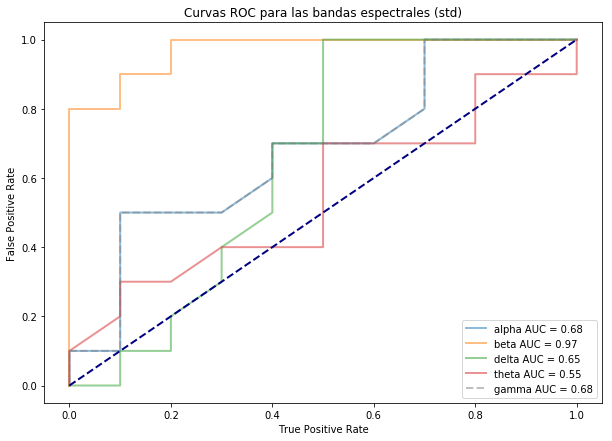

In [73]:
plt.figure(figsize=(10, 7))
plot(fprs_a, tprs_a, lw=2, alpha=0.5, label='alpha AUC = {:.2f}'.format(aroc_a))
plot(fprs_b, tprs_b, lw=2, alpha=0.5, label='beta AUC = {:.2f}'.format(aroc_b))
plot(fprs_d, tprs_d, lw=2, alpha=0.5, label='delta AUC = {:.2f}'.format(aroc_d))
plot(fprs_t, tprs_t, lw=2, alpha=0.5, label='theta AUC = {:.2f}'.format(aroc_t))
plot(fprs_g, tprs_g, lw=2, alpha=0.5, color='gray', linestyle='--', label='gamma AUC = {:.2f}'.format(aroc_g))
plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
xlabel('True Positive Rate')
ylabel('False Positive Rate')
legend(loc='lower right')
title('Curvas ROC para las bandas espectrales (std)')

Para los atributos correspondientes al desvío estándar de las potencias en cada banda espectral se encuentra que nuevamente la banda beta tiene un buen desempeño al identificar a los sujetos del grupo S con un AUC de 0.97. Para el resto de los atributos se encuentra un desempeño similar al del una clasificación por azar. Nuevamente las bandas alpha y gamma devuelven una AUC idéntica.

#### Sensibilidad y especificidad para cada banda espectral (std)

A modo de ejemplo en la siguiente tabla se ha seleccionado un umbral para cada atributo y se reporta la Especificidad (TNR) y la Sensibilidad (TPR)

In [103]:
i = 70
pd.DataFrame({'Sensibilidad':{'alpha': tprs_a[i], 'beta': tprs_b[i], 'delta': tprs_d[i], 'theta': tprs_t[i], 'gamma': tprs_g[i]}, 'Especificidad': {'alpha': tnrs_a[i], 'beta': tnrs_b[i], 'delta': tnrs_d[i], 'theta': tnrs_t[i], 'gamma': tnrs_g[i]}, 'Umbral': {'alpha': xs_a[i], 'beta': xs_b[i], 'delta': xs_d[i], 'theta': xs_t[i], 'gamma': xs_g[i]}})

,Especificidad,Sensibilidad,Umbral
alpha,1.0,0.3,0.115418
beta,1.0,0.4,0.197837
delta,1.0,0.4,0.712219
gamma,1.0,0.3,0.115418
theta,1.0,0.2,0.221348


### Atributo: Potencia de bandas espectrales normalizadas (promedio entre trials)

In [104]:
band_norm_mean = pd.read_pickle('pickles/band_power_norm_mean.pkl')

Se aplica la función _roc_ _univariado_ para todas las bandas espectrales normalizadas:

In [105]:
xs_a, tprs_a, fprs_a, aroc_a, tnrs_a = roc_univariado(band_norm_mean['alpha'], etiquetas, 'S')
xs_b, tprs_b, fprs_b, aroc_b, tnrs_b = roc_univariado(band_norm_mean['beta'], etiquetas, 'S')
xs_d, tprs_d, fprs_d, aroc_d, tnrs_d = roc_univariado(band_norm_mean['delta'], etiquetas, 'P')
xs_t, tprs_t, fprs_t, aroc_t, tnrs_t = roc_univariado(band_norm_mean['theta'], etiquetas, 'S')
xs_g, tprs_g, fprs_g, aroc_g, tnrs_g = roc_univariado(band_norm_mean['gamma'], etiquetas, 'S')

#### Curva ROC - Atributo: potencia normalizada de banda espectral (promedio entre trials)

A continuación se grafican todas las curvas ROC según la clasificación anterior. Además se reporta el área bajo la curva para cada caso.

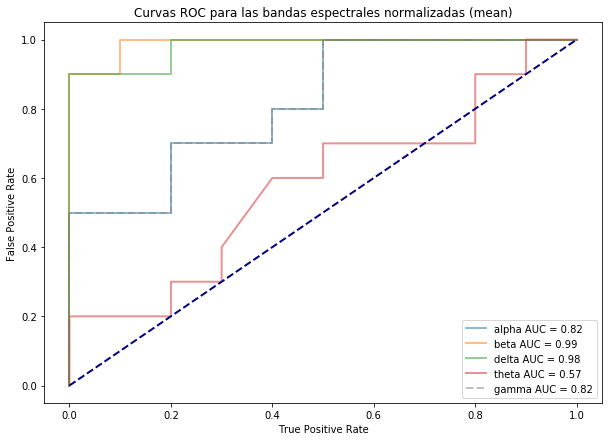

In [106]:
plt.figure(figsize=(10, 7))
plot(fprs_a, tprs_a, lw=2, alpha=0.5, label='alpha AUC = {:.2f}'.format(aroc_a))
plot(fprs_b, tprs_b, lw=2, alpha=0.5, label='beta AUC = {:.2f}'.format(aroc_b))
plot(fprs_d, tprs_d, lw=2, alpha=0.5, label='delta AUC = {:.2f}'.format(aroc_d))
plot(fprs_t, tprs_t, lw=2, alpha=0.5, label='theta AUC = {:.2f}'.format(aroc_t))
plot(fprs_g, tprs_g, lw=2, alpha=0.5, color='gray', linestyle='--', label='gamma AUC = {:.2f}'.format(aroc_g))
plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
xlabel('True Positive Rate')
ylabel('False Positive Rate')
legend(loc='lower right')
title('Curvas ROC para las bandas espectrales normalizadas (mean)')

Para el caso del promedio de las potencias de las bandas espectrales normalizadas como atributos se encuentran los mismos resultados que para el caso sin normalización.

#### Sensibilidad y especificidad para cada banda espectral normalizada (mean)

A modo de ejemplo en la siguiente tabla se ha seleccionado un umbral para cada atributo y se reporta la Especificidad (TNR) y la Sensibilidad (TPR)

In [134]:
i = 45
pd.DataFrame({'Sensibilidad':{'alpha': tprs_a[i], 'beta': tprs_b[i], 'delta': tprs_d[i], 'theta': tprs_t[i], 'gamma': tprs_g[i]}, 'Especificidad': {'alpha': tnrs_a[i], 'beta': tnrs_b[i], 'delta': tnrs_d[i], 'theta': tnrs_t[i], 'gamma': tnrs_g[i]}, 'Umbral': {'alpha': xs_a[i], 'beta': xs_b[i], 'delta': xs_d[i], 'theta': xs_t[i], 'gamma': xs_g[i]}})

,Especificidad,Sensibilidad,Umbral
alpha,0.9,0.5,0.076663
beta,0.9,0.9,0.135439
delta,1.0,0.9,0.576025
gamma,0.9,0.5,0.076663
theta,0.6,0.6,0.163230


### Atributo: Potencia de bandas espectrales normalizadas (desvío standard entre trials)

In [108]:
band_norm_std = pd.read_pickle('pickles/band_power_norm_std.pkl')

Se aplica la función _roc_ _univariado_ para todas las bandas espectrales normalizadas:

In [109]:
xs_a, tprs_a, fprs_a, aroc_a, tnrs_a = roc_univariado(band_norm_std['alpha'], etiquetas, 'S')
xs_b, tprs_b, fprs_b, aroc_b, tnrs_b = roc_univariado(band_norm_std['beta'], etiquetas, 'S')
xs_d, tprs_d, fprs_d, aroc_d, tnrs_d = roc_univariado(band_norm_std['delta'], etiquetas, 'S')
xs_t, tprs_t, fprs_t, aroc_t, tnrs_t = roc_univariado(band_norm_std['theta'], etiquetas, 'P')
xs_g, tprs_g, fprs_g, aroc_g, tnrs_g = roc_univariado(band_norm_std['gamma'], etiquetas, 'S')

#### Curva ROC - Atributo: banda espectral normalizada (std)

A continuación se grafican todas las curvas ROC según la clasificación anterior. Además se reporta el área bajo la curva para cada caso.

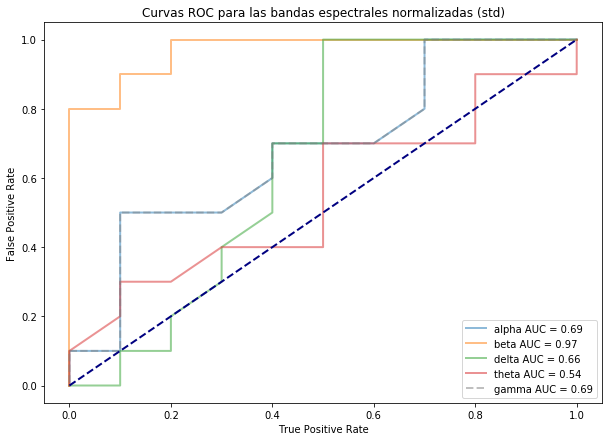

In [110]:
plt.figure(figsize=(10, 7))
plot(fprs_a, tprs_a, lw=2, alpha=0.5, label='alpha AUC = {:.2f}'.format(aroc_a))
plot(fprs_b, tprs_b, lw=2, alpha=0.5, label='beta AUC = {:.2f}'.format(aroc_b))
plot(fprs_d, tprs_d, lw=2, alpha=0.5, label='delta AUC = {:.2f}'.format(aroc_d))
plot(fprs_t, tprs_t, lw=2, alpha=0.5, label='theta AUC = {:.2f}'.format(aroc_t))
plot(fprs_g, tprs_g, lw=2, alpha=0.5, color='gray', linestyle='--', label='gamma AUC = {:.2f}'.format(aroc_g))
plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
xlabel('True Positive Rate')
ylabel('False Positive Rate')
legend(loc='lower right')
title('Curvas ROC para las bandas espectrales normalizadas (std)')

#### Sensibilidad y especificidad para cada banda espectral normalizada (mean)

A modo de ejemplo en la siguiente tabla se ha seleccionado un umbral para cada atributo y se reporta la Especificidad (TNR) y la Sensibilidad (TPR)

In [111]:
i = 70
pd.DataFrame({'Sensibilidad':{'alpha': tprs_a[i], 'beta': tprs_b[i], 'delta': tprs_d[i], 'theta': tprs_t[i], 'gamma': tprs_g[i]}, 'Especificidad': {'alpha': tnrs_a[i], 'beta': tnrs_b[i], 'delta': tnrs_d[i], 'theta': tnrs_t[i], 'gamma': tnrs_g[i]}, 'Umbral': {'alpha': xs_a[i], 'beta': xs_b[i], 'delta': xs_d[i], 'theta': xs_t[i], 'gamma': xs_g[i]}})

,Especificidad,Sensibilidad,Umbral
alpha,0.9,0.1,0.058158
beta,1.0,0.4,0.079783
delta,0.8,0.1,0.163077
gamma,0.9,0.1,0.058158
theta,0.6,0.4,0.089524


### Atributo: entropía intra-electrodo (mean y std)

In [114]:
intra_entropy = pd.read_pickle('pickles/intra_entropy.pkl')

Se aplica la función _roc_ _univariado_ para todas las bandas espectrales normalizadas:

In [115]:
xs_intra_mean, tprs_intra_mean, fprs_intra_mean, aroc_intra_mean, tnrs_intra_mean = roc_univariado(intra_entropy['mean'], etiquetas, 'S')
xs_intra_std, tprs_intra_std, fprs_intra_std, aroc_intra_std, tnrs_intra_std = roc_univariado(intra_entropy['std'], etiquetas, 'P')

#### Curva ROC - Atributo: entropía intra-electrodo (mean, std)

A continuación se grafican todas las curvas ROC según la clasificación anterior. Además se reporta el área bajo la curva para cada caso.

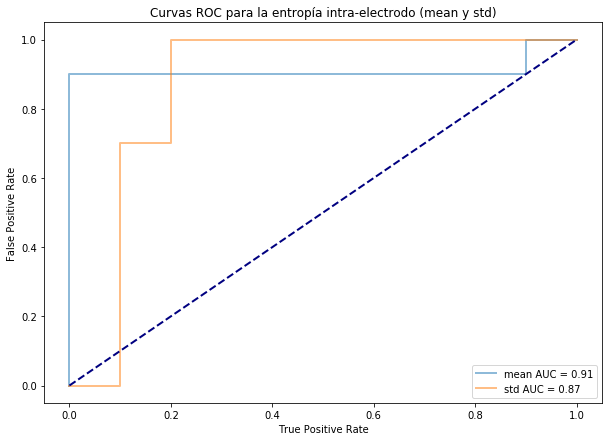

In [116]:
plt.figure(figsize=(10, 7))
plot(fprs_intra_mean, tprs_intra_mean, lw=2, alpha=0.5, label='mean AUC = {:.2f}'.format(aroc_intra_mean))
plot(fprs_intra_std, tprs_intra_std, lw=2, alpha=0.5, label='std AUC = {:.2f}'.format(aroc_intra_std))
plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
xlabel('True Positive Rate')
ylabel('False Positive Rate')
legend(loc='lower right')
title('Curvas ROC para la entropía intra-electrodo (mean y std)')

Para el caso de la entropía intra-electrodos se obtiene que el promedio de las mediciones resulta ser un buen atributo para identificar sujetos del grupo S (AUC = 0.91) mientras que su desvío estándar arroja AUC = 0.87 al identificar sujetos del grupo P. 

#### Sensibilidad y especificidad para cada banda espectral normalizada (mean)

A modo de ejemplo en la siguiente tabla se ha seleccionado un umbral para cada atributo y se reporta la Especificidad (TNR) y la Sensibilidad (TPR)

In [117]:
i = 70
pd.DataFrame({'Sensibilidad':{'mean': tprs_intra_mean[i], 'std': tprs_intra_std[i]}, 'Especificidad': {'mean': tnrs_intra_mean[i], 'std': tnrs_intra_std[i]}, 'Umbral': {'mean': xs_intra_mean[i], 'std': xs_intra_std[i]}})

,Especificidad,Sensibilidad,Umbral
mean,1.0,0.7,1.920299
std,0.9,0.0,0.054180


### Atributo: entropía inter-electrodo (mean y std)